In [3]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=106b1e8c80f19b93146e49715de3d2e89b6dc9ece48eab789e49c0d6a1f47b7f
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
     

In [4]:
pip install kmodes

In [6]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel('/content/dataset_residuos_final.xlsx')
df

,UBIGEO,ANIO,DEPARTAMENTO,PROVINCIA,DISTRITO,REGION_NATURAL,TIPO_MUNICIPALIDAD,POB_TOTAL_INEI,POB_URBANA_INEI,POB_RURAL_INEI,CLASIFICACION_MUNICIPAL_MEF,GENERACION_PER_CAPITA_DOM,GENERACION_DOM_URBANA_TDIA,GENERACION_DOM URBANA_TANIO,GENERACION_MUN_TANIO,GENERACION_MUN_TDIA,GENERACION_PER_CAPITA_MUNICIPAL,latitud,longitud
0,10101,2022,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,SELVA,PROVINCIAL,40274,39322,952,A,0.39,15.34,5597.49,7996.41,21.91,0.56,-6.247736,-77.856492
1,10102,2022,AMAZONAS,CHACHAPOYAS,ASUNCION,SELVA,DISTRITAL,276,132,144,F,0.52,0.07,25.00,35.71,0.1,0.74,-5.996135,-77.743201
2,10103,2022,AMAZONAS,CHACHAPOYAS,BALSAS,SIERRA,DISTRITAL,1158,281,877,G,0.45,0.13,45.67,65.24,0.18,0.64,-6.807839,-77.949422
3,10104,2022,AMAZONAS,CHACHAPOYAS,CHETO,SIERRA,DISTRITAL,707,444,263,F,0.45,0.20,72.16,103.09,0.28,0.64,-6.297970,-77.677166
4,10105,2022,AMAZONAS,CHACHAPOYAS,CHILIQUIN,SIERRA,DISTRITAL,575,148,427,G,0.45,0.07,24.05,34.36,0.09,0.64,-6.078207,-77.755868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483,250302,2019,UCAYALI,PADRE ABAD,IRAZOLA,SELVA,DISTRITAL,11656,7363,4293,F,0.44,3.24,1182.50,1689.28,4.63,0.63,-8.950516,-75.279918
7484,250303,2019,UCAYALI,PADRE ABAD,CURIMANA,SELVA,DISTRITAL,9803,4622,5181,F,0.54,2.50,911.00,1301.42,3.57,0.77,-8.417380,-75.297114
7485,250304,2019,UCAYALI,PADRE ABAD,NESHUYA,SELVA,DISTRITAL,10080,5049,5031,F,0.49,2.47,903.01,1290.02,3.53,0.70,-8.641299,-75.049031
7486,250305,2019,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,SELVA,DISTRITAL,6037,4524,1513,E,0.43,1.94,706.74,1009.63,2.77,0.61,-8.824928,-75.048021


In [8]:
#Analisis general del dataset con profiling
profile = ProfileReport(df, title="Reporte de Datos", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 19/19 [00:00<00:00, 29.37it/s]
Exception ignored in: <function ZipFile.__del__ at 0x7a39873f6840>
Traceback (most recent call last):
  File "/usr/lib/python3.12/zipfile/__init__.py", line 1951, in __del__
    def __del__(self):

KeyboardInterrupt: 


KeyboardInterrupt: 

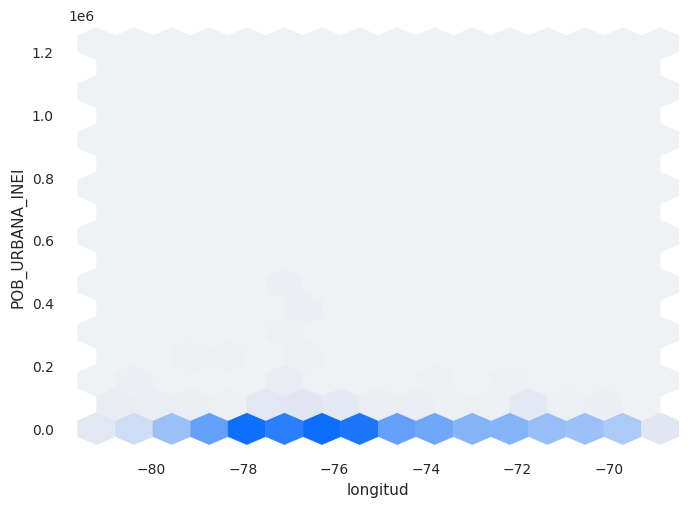

In [6]:
profile

In [9]:
#Eliminar duplicados
duplicados = df[df.duplicated(keep=False)]   # todos los duplicados
print("Registros duplicados encontrados:")
print(duplicados)
df.drop_duplicates(inplace=True)

Registros duplicados encontrados:
Empty DataFrame
Columns: [UBIGEO, ANIO, DEPARTAMENTO, PROVINCIA, DISTRITO, REGION_NATURAL, TIPO_MUNICIPALIDAD, POB_TOTAL_INEI, POB_URBANA_INEI, POB_RURAL_INEI, CLASIFICACION_MUNICIPAL_MEF, GENERACION_PER_CAPITA_DOM, GENERACION_DOM_URBANA_TDIA, GENERACION_DOM URBANA_TANIO, GENERACION_MUN_TANIO, GENERACION_MUN_TDIA, GENERACION_PER_CAPITA_MUNICIPAL, latitud, longitud]
Index: []


In [10]:
#verificar valores nulos
#Dada la naturaleza del dataset es complicado hallar valores nulos
print(df.isnull().sum())

UBIGEO                             0
ANIO                               0
DEPARTAMENTO                       0
PROVINCIA                          0
DISTRITO                           0
REGION_NATURAL                     0
TIPO_MUNICIPALIDAD                 0
POB_TOTAL_INEI                     0
POB_URBANA_INEI                    0
POB_RURAL_INEI                     0
CLASIFICACION_MUNICIPAL_MEF        0
GENERACION_PER_CAPITA_DOM          0
GENERACION_DOM_URBANA_TDIA         0
GENERACION_DOM URBANA_TANIO        0
GENERACION_MUN_TANIO               0
GENERACION_MUN_TDIA                0
GENERACION_PER_CAPITA_MUNICIPAL    0
latitud                            0
longitud                           0
dtype: int64


ANÁLISIS DE OUTLIERS - ESTADÍSTICOS
count    7488.000000
mean        0.671386
std         0.169451
min         0.160000
25%         0.620000
50%         0.640000
75%         0.740000
max         2.860000
Name: GENERACION_PER_CAPITA_MUNICIPAL, dtype: float64

Límite inferior (IQR): 0.44
Límite superior (IQR): 0.9199999999999999
Número de outliers potenciales (IQR): 1102


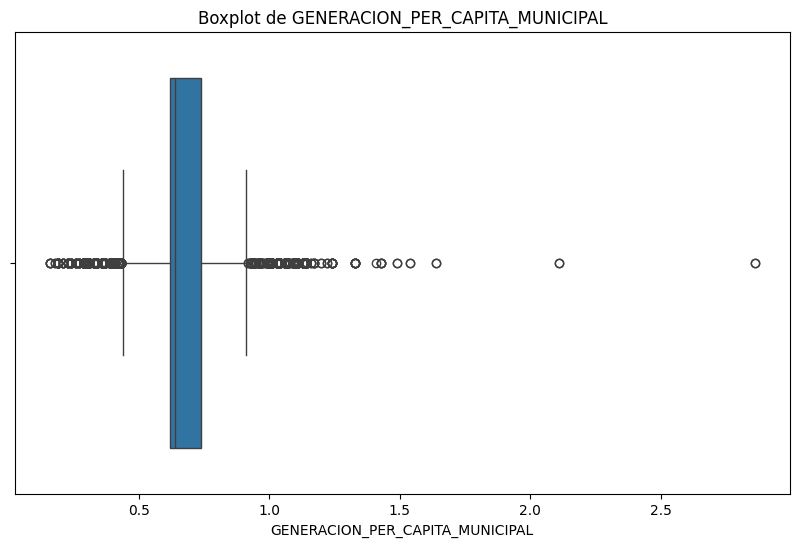

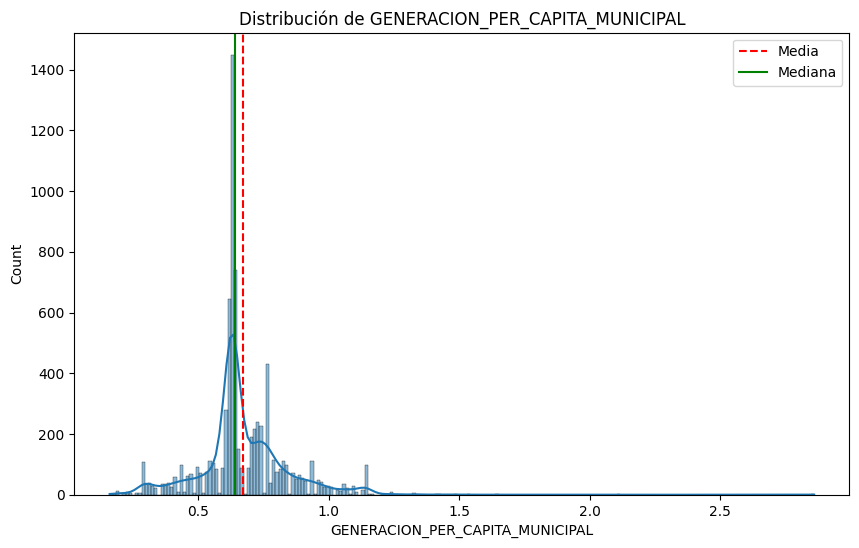

In [11]:
#Analisis de valores atípicos en variables de interes, más adelante se vuelve a hacer
columna0 = 'GENERACION_PER_CAPITA_MUNICIPAL'

# 1. ESTADÍSTICOS DESCRIPTIVOS BÁSICOS
print("="*50)
print("ANÁLISIS DE OUTLIERS - ESTADÍSTICOS")
print("="*50)
print(df[columna0].describe())

# Cálculo de límites usando el rango intercuartílico (IQR)
Q1 = df[columna0].quantile(0.25)
Q3 = df[columna0].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"\nLímite inferior (IQR): {limite_inferior}")
print(f"Límite superior (IQR): {limite_superior}")
print(f"Número de outliers potenciales (IQR): {len(df[(df[columna0] < limite_inferior) | (df[columna0] > limite_superior)])}")

# 2. VISUALIZACIÓN CON BOXPLOT
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[columna0])
plt.title(f'Boxplot de {columna0}')
plt.show()

# 3. VISUALIZACIÓN CON HISTOGRAMA Y DISTRIBUCIÓN
plt.figure(figsize=(10, 6))
sns.histplot(df[columna0], kde=True)  # kde=True añade la línea de densidad
plt.axvline(df[columna0].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df[columna0].median(), color='g', linestyle='-', label='Mediana')
plt.title(f'Distribución de {columna0}')
plt.legend()
plt.show()

ANÁLISIS DE OUTLIERS - ESTADÍSTICOS
count    7484.000000
mean       11.261259
std        46.584475
min         0.020000
25%         0.310000
50%         0.810000
75%         3.270000
max       880.830000
Name: GENERACION_MUN_TDIA, dtype: float64

Límite inferior (IQR): -4.13
Límite superior (IQR): 7.709999999999999
Número de outliers potenciales (IQR): 1230


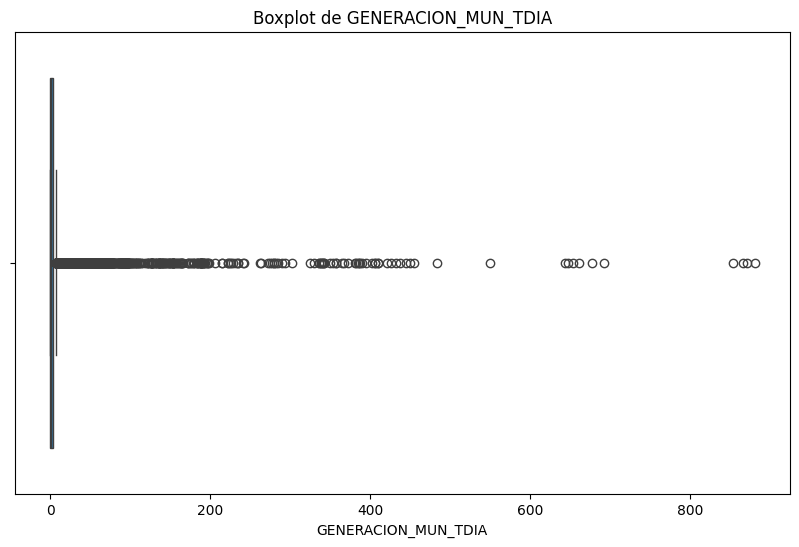

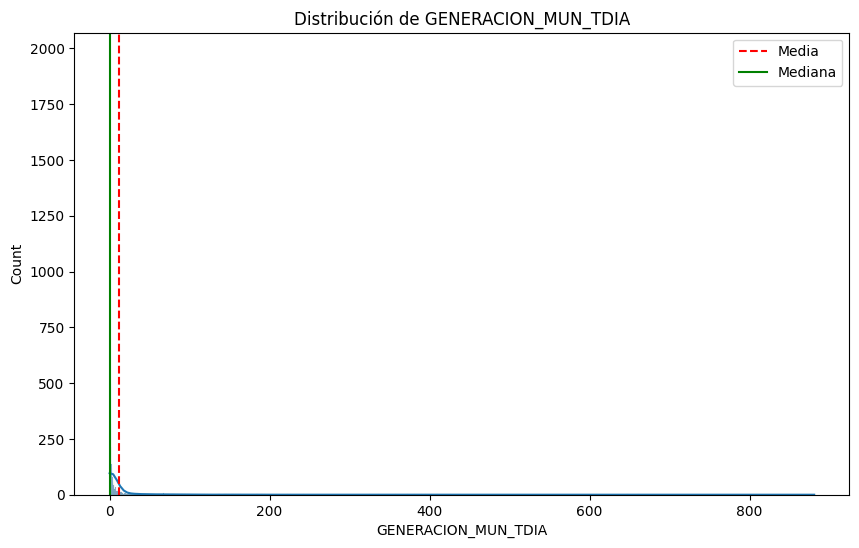

In [12]:
df['GENERACION_MUN_TDIA'] = pd.to_numeric(df['GENERACION_MUN_TDIA'], errors='coerce')
columna1 = 'GENERACION_MUN_TDIA'
##ACA HABRÁ MUCHOS ATIPICOS, PUES HAY MUNUCIPALIDADES QUE SON, EN TERMINOS DE HABITANTES, HASTA 50 VECES MÁS GRANDES QUE OTRAS O MÁS
# 1. ESTADÍSTICOS DESCRIPTIVOS BÁSICOS
print("="*50)
print("ANÁLISIS DE OUTLIERS - ESTADÍSTICOS")
print("="*50)
print(df[columna1].describe())

# Cálculo de límites usando el rango intercuartílico (IQR)
Q1 = df[columna1].quantile(0.25)
Q3 = df[columna1].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"\nLímite inferior (IQR): {limite_inferior}")
print(f"Límite superior (IQR): {limite_superior}")
print(f"Número de outliers potenciales (IQR): {len(df[(df[columna1] < limite_inferior) | (df[columna1] > limite_superior)])}")

# 2. VISUALIZACIÓN CON BOXPLOT
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[columna1])
plt.title(f'Boxplot de {columna1}')
plt.show()

# 3. VISUALIZACIÓN CON HISTOGRAMA Y DISTRIBUCIÓN
plt.figure(figsize=(10, 6))
sns.histplot(df[columna1], kde=True)  # kde=True añade la línea de densidad
plt.axvline(df[columna1].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df[columna1].median(), color='g', linestyle='-', label='Mediana')
plt.title(f'Distribución de {columna1}')
plt.legend()
plt.show()

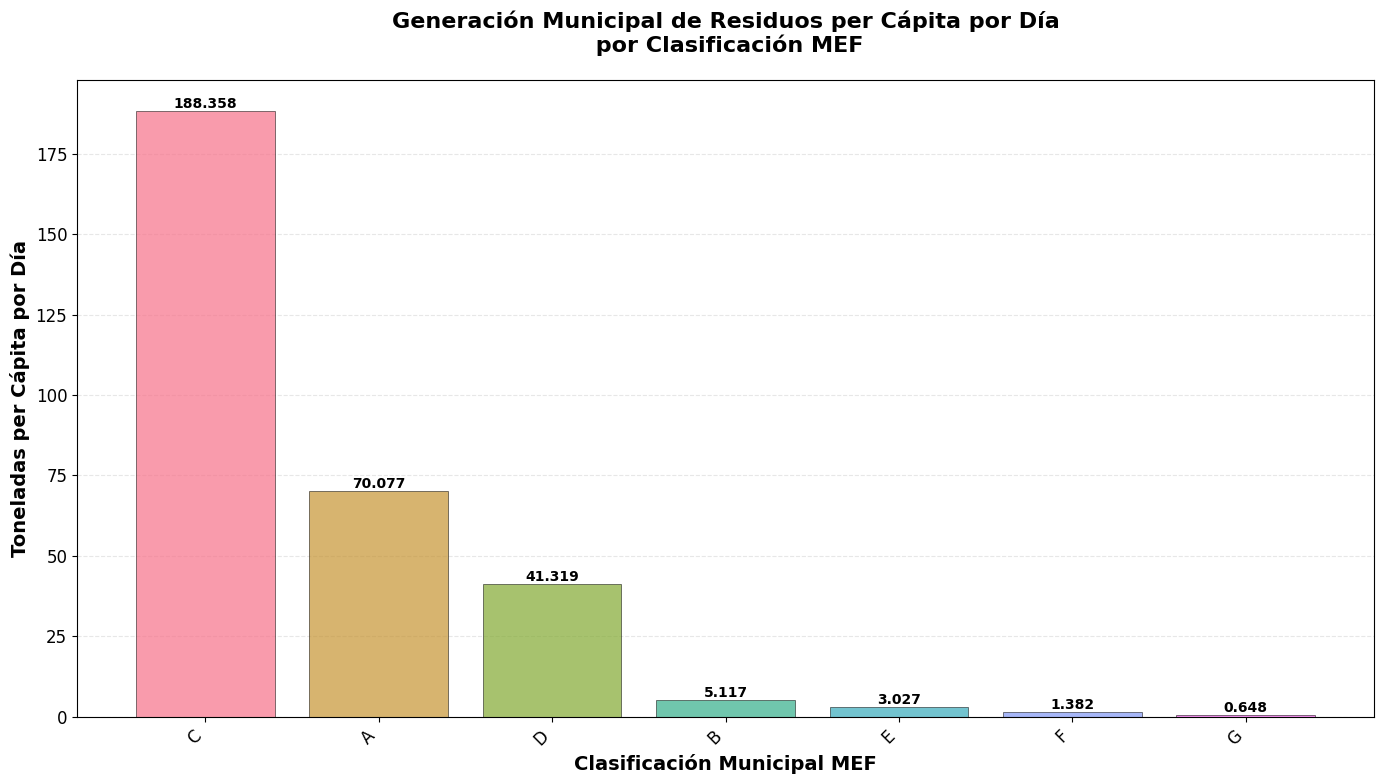

ESTADÍSTICAS DESCRIPTIVAS POR CLASIFICACIÓN MEF
                              count        mean         std   min      25%  \
CLASIFICACION_MUNICIPAL_MEF                                                  
A                             296.0   70.076791   74.627056  9.47  23.7425   
B                             488.0    5.117480    5.018267  0.46   1.5675   
C                             164.0  188.357988  195.410746  1.11  51.6450   
D                             512.0   41.319473   46.239095  1.06  13.2525   
E                            1512.0    3.027407    4.434689  0.05   0.3775   
F                            2032.0    1.381634    1.782863  0.06   0.3200   
G                            2480.0    0.648387    0.930755  0.02   0.1900   

                                 50%       75%     max  
CLASIFICACION_MUNICIPAL_MEF                             
A                             43.770   81.1050  550.46  
B                              2.990    7.1450   25.32  
C                    

In [13]:
#GRAFICOS SOBRE GENERACION MUN DIARIOS POR CLASFICACIÓN DE CADA MUNI
# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 1. Agrupar los datos por clasificación MEF y calcular la media
df_agrupado = df.groupby('CLASIFICACION_MUNICIPAL_MEF')['GENERACION_MUN_TDIA'].mean().reset_index()
df_agrupado = df_agrupado.sort_values('GENERACION_MUN_TDIA', ascending=False)

# 2. Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico de barras
barras = ax.bar(df_agrupado['CLASIFICACION_MUNICIPAL_MEF'],
                df_agrupado['GENERACION_MUN_TDIA'],
                color=sns.color_palette("husl", len(df_agrupado)),
                alpha=0.7,
                edgecolor='black',
                linewidth=0.5)

# 3. Personalizar el gráfico
ax.set_title('Generación Municipal de Residuos per Cápita por Día\n por Clasificación MEF',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Clasificación Municipal MEF', fontsize=14, fontweight='bold')
ax.set_ylabel('Toneladas per Cápita por Día', fontsize=14, fontweight='bold')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir valores en las barras
for barra in barras:
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2., height + 0.001,
            f'{height:.3f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Añadir grid
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Ajustar layout
plt.tight_layout()

# 4. Mostrar el gráfico
plt.show()

# 5. (Opcional) Mostrar estadísticas descriptivas
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS POR CLASIFICACIÓN MEF")
print("=" * 60)
print(df.groupby('CLASIFICACION_MUNICIPAL_MEF')['GENERACION_MUN_TDIA'].describe())



Serie anual nacional (toneladas):
   ANIO  GENERACION_MUN_TANIO
0  2019            7771649.50
1  2020            7894368.89
2  2021            8190917.68
3  2022            8430483.29


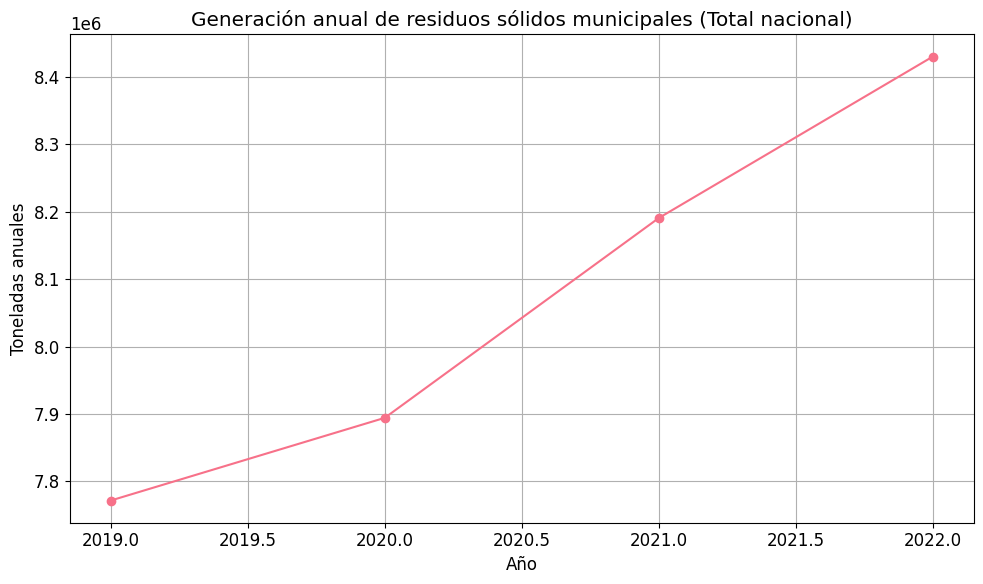

In [14]:
#Serie temporal nacional (Generación municipal anual total)

if {"ANIO", "GENERACION_MUN_TANIO"}.issubset(df.columns):
    serie_anual = (
        df.groupby("ANIO", as_index=False)["GENERACION_MUN_TANIO"]
          .sum()
          .sort_values("ANIO")
    )
    print("\nSerie anual nacional (toneladas):")
    print(serie_anual)

    plt.figure(figsize=(10, 6))
    plt.plot(serie_anual["ANIO"], serie_anual["GENERACION_MUN_TANIO"], marker="o")
    plt.xlabel("Año")
    plt.ylabel("Toneladas anuales")
    plt.title("Generación anual de residuos sólidos municipales (Total nacional)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Top 5 departamentos por generación anual promedio (toneladas):
  DEPARTAMENTO  GENERACION_MUN_TANIO
0         LIMA          3.538481e+06
1        PIURA          4.507977e+05
2  LA LIBERTAD          4.491818e+05
3       CALLAO          3.514269e+05
4     AREQUIPA          3.491770e+05


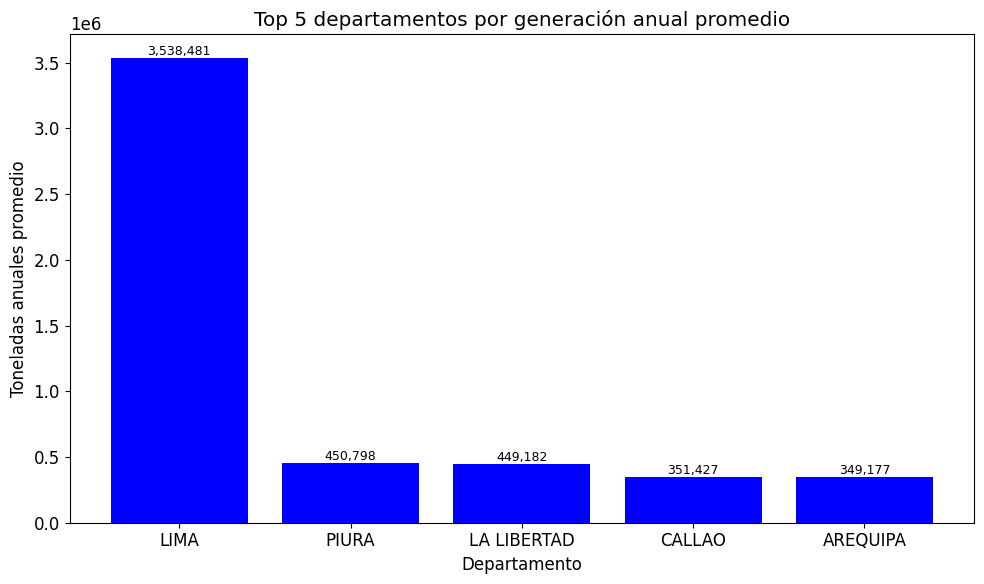

In [15]:
# Top 5 departamentos por generación anual promedio

df["DEPARTAMENTO"] = df["DEPARTAMENTO"].str.strip()
dept_anual = df.groupby(["DEPARTAMENTO", "ANIO"])["GENERACION_MUN_TANIO"].sum().reset_index()
top5 = (
    dept_anual.groupby("DEPARTAMENTO")["GENERACION_MUN_TANIO"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

print("\nTop 5 departamentos por generación anual promedio (toneladas):")
print(top5)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(top5["DEPARTAMENTO"], top5["GENERACION_MUN_TANIO"], color="blue")
for i, v in enumerate(top5["GENERACION_MUN_TANIO"]):
    plt.text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)
plt.xlabel("Departamento")
plt.ylabel("Toneladas anuales promedio")
plt.title("Top 5 departamentos por generación anual promedio")
plt.tight_layout()
plt.show()



In [16]:
df["DEPARTAMENTO"] = df["DEPARTAMENTO"].str.strip()


df["DEPARTAMENTO"].unique()

array(['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO',
       'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA',
       'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO',
       'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO',
       'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI'], dtype=object)

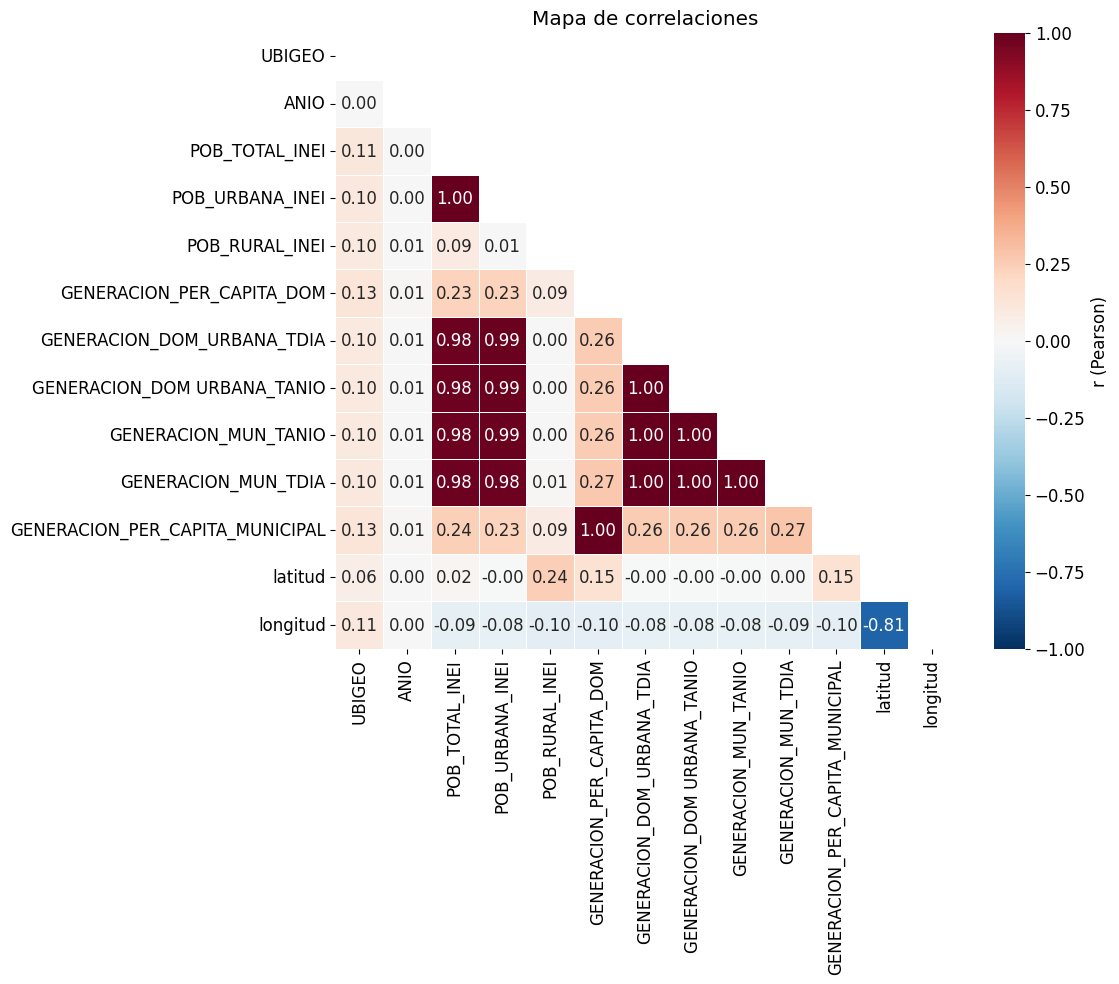

In [17]:
# 1) Correlaciones solo de columnas numéricas
corr = df.select_dtypes(include=["number"]).corr()

# 2) Máscara para mostrar solo el triángulo inferior
mask = np.triu(np.ones_like(corr, dtype=bool))

# 3) Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    cmap="RdBu_r", vmin=-1, vmax=1, linewidths=.5,
    cbar_kws={"label": "r (Pearson)"}
)
plt.title("Mapa de correlaciones")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [18]:
##CLUSTERING
#BUSCAR RESPONDER A ALGUNAS PREGUNTAS
#¿Existen grupos de distritos con alta generación de residuos pero baja población?
#¿Cómo se relaciona el tipo de municipalidad con la generación de residuos?

In [19]:
# Variables relevantes para el análisis
variables_clustering = [
    'POB_TOTAL_INEI',           # Población total
    'POB_URBANA_INEI',          # Población urbana
    'GENERACION_MUN_TANIO',     # Generación total de residuos anual
    'GENERACION_PER_CAPITA_MUNICIPAL',  # Generación per cápita
    'TIPO_MUNICIPALIDAD',       # Tipo de municipalidad (categórica)
    'CLASIFICACION_MUNICIPAL_MEF'  # Clasificación MEF (categórica)
]

# Crear subdataset para clustering
df_cluster = df[variables_clustering].copy()

In [20]:
# Codificación de variables categóricas (one-hot encoding)
df_encoded = pd.get_dummies(df_cluster,
                           columns=['TIPO_MUNICIPALIDAD', 'CLASIFICACION_MUNICIPAL_MEF'],
                           prefix=['TIPO', 'CLASIF'])

print("Dimensiones después de codificación:", df_encoded.shape)

Dimensiones después de codificación: (7488, 13)


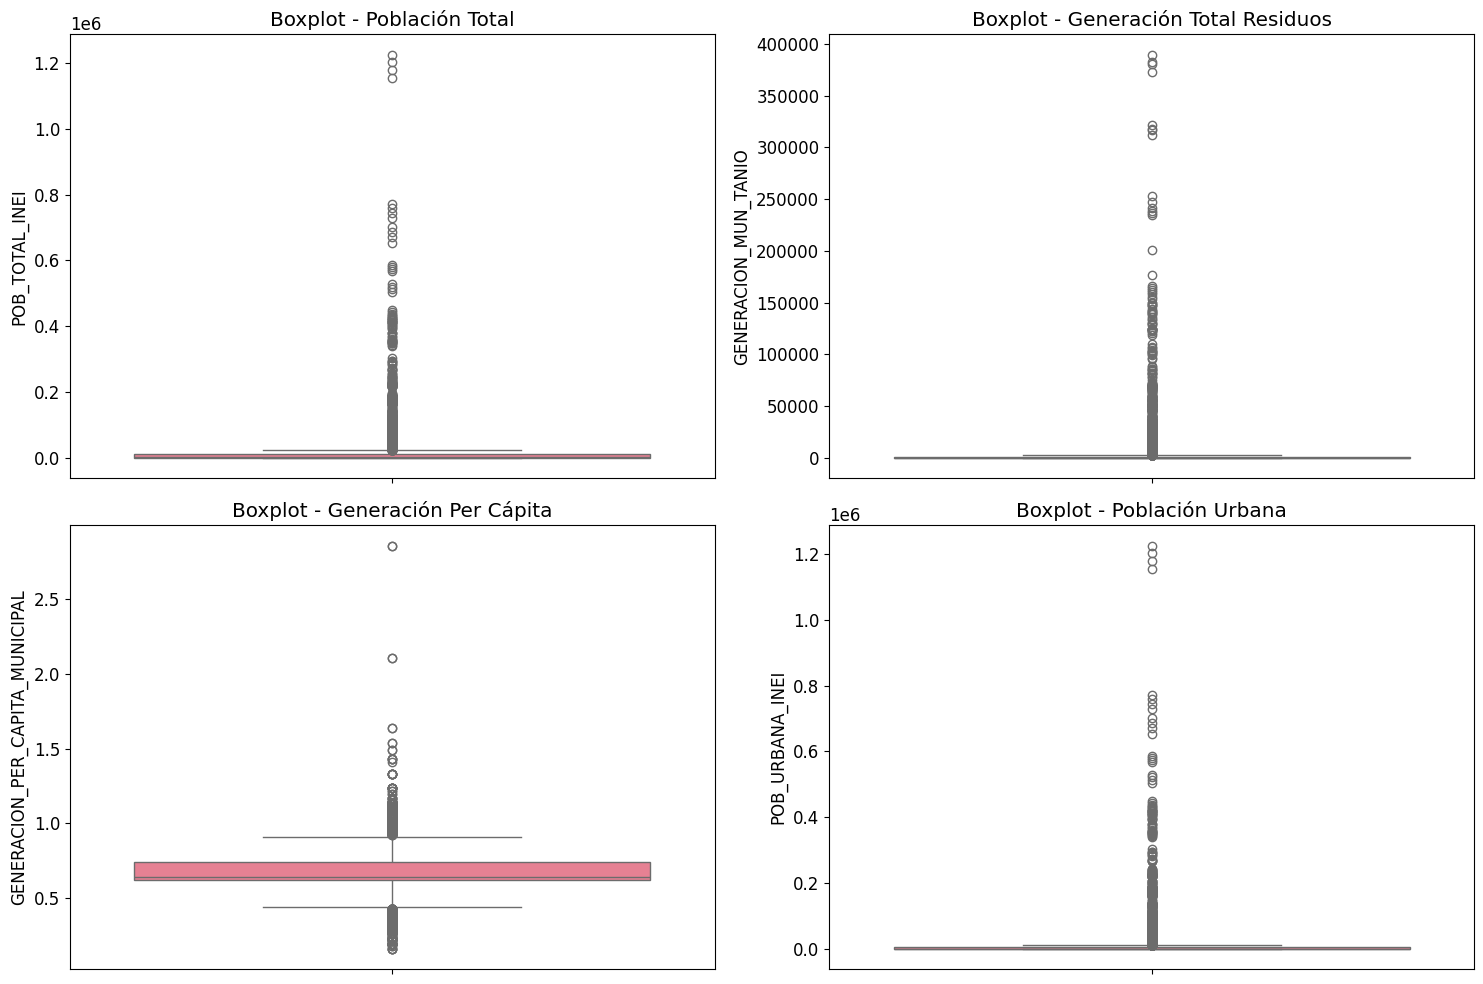

In [21]:
# Boxplots para detectar outliers en variables numéricas
#COMO SE SEÑALÓ PREVIAMENTE, EXISTIRÁN MUCHOS VALORES ATIPICOS
#PUES LA GENERACIÓN ESTÁ FUERTEMENTE ARRAIGADA AL TAMAÑO DE LA POBLACIÓN
#HAY MUNICIPALIDADES MUY PEQUEÑAS EN TERMINOS POBLACIONALES
#Y OTRAS SUMAMENTE ENORMES
#AUN ASÍ, PARA ESTE ANALISIS SE CONSIDERA MANTENER LOS ATIPICOS
#POR EJEMPLO, SI QUISIERAMOS ANALIZAR POSTERIORMENTE
#LA EXISTENCIA DE MUNICIPALIDADES PEQUEÑAS, PERO CON GENERACIÓN GRANDE
#NOS CONVIENE DEJAR LOS DATOS REALES TAL CUAL
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Población total
sns.boxplot(y=df_encoded['POB_TOTAL_INEI'], ax=axes[0,0])
axes[0,0].set_title('Boxplot - Población Total')

# Generación total de residuos
sns.boxplot(y=df_encoded['GENERACION_MUN_TANIO'], ax=axes[0,1])
axes[0,1].set_title('Boxplot - Generación Total Residuos')

# Generación per cápita
sns.boxplot(y=df_encoded['GENERACION_PER_CAPITA_MUNICIPAL'], ax=axes[1,0])
axes[1,0].set_title('Boxplot - Generación Per Cápita')

# Población urbana
sns.boxplot(y=df_encoded['POB_URBANA_INEI'], ax=axes[1,1])
axes[1,1].set_title('Boxplot - Población Urbana')

plt.tight_layout()
plt.show()

In [22]:
# Seleccionar solo variables numéricas para escalar
numeric_vars = ['POB_TOTAL_INEI', 'POB_URBANA_INEI', 'POB_URBANA_INEI',
                'GENERACION_MUN_TANIO', 'GENERACION_PER_CAPITA_MUNICIPAL']

# Crear scaler y aplicar transformación
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_vars] = scaler.fit_transform(df_encoded[numeric_vars])

print("Datos escalados - primeras filas:")
print(df_scaled[numeric_vars].head())

Datos escalados - primeras filas:
   POB_TOTAL_INEI  POB_URBANA_INEI  POB_URBANA_INEI  GENERACION_MUN_TANIO  \
0        0.399876         0.439861         0.439861              0.192874   
1       -0.300637        -0.249428        -0.249428             -0.223845   
2       -0.285190        -0.246808        -0.246808             -0.222299   
3       -0.293088        -0.243941        -0.243941             -0.220318   
4       -0.295400        -0.249147        -0.249147             -0.223916   

   GENERACION_PER_CAPITA_MUNICIPAL  
0                        -0.657381  
1                         0.404946  
2                        -0.185236  
3                        -0.185236  
4                        -0.185236  


In [23]:
#ESTADISTICAS POR TIPO MUNICIPALIDAD
stats_tipo_municipalidad = df.groupby('TIPO_MUNICIPALIDAD').agg({

    'GENERACION_MUN_TANIO': ['mean', 'median', 'std', 'count'],
    'GENERACION_PER_CAPITA_MUNICIPAL': ['mean', 'median', 'std'],
    'POB_TOTAL_INEI': ['mean', 'median']
}).round(2)

print("\nEstadísticas por Tipo de Municipalidad:")
print(stats_tipo_municipalidad)


Estadísticas por Tipo de Municipalidad:
                   GENERACION_MUN_TANIO                           \
                                   mean   median       std count   
TIPO_MUNICIPALIDAD                                                 
DISTRITAL                       3550.84   245.34  18809.36  6704   
PROVINCIAL                     10819.64  3187.64  20344.67   784   

                   GENERACION_PER_CAPITA_MUNICIPAL               \
                                              mean median   std   
TIPO_MUNICIPALIDAD                                                
DISTRITAL                                     0.67   0.63  0.17   
PROVINCIAL                                    0.73   0.73  0.20   

                   POB_TOTAL_INEI           
                             mean   median  
TIPO_MUNICIPALIDAD                          
DISTRITAL                14460.22   3355.5  
PROVINCIAL               42937.56  20277.5  


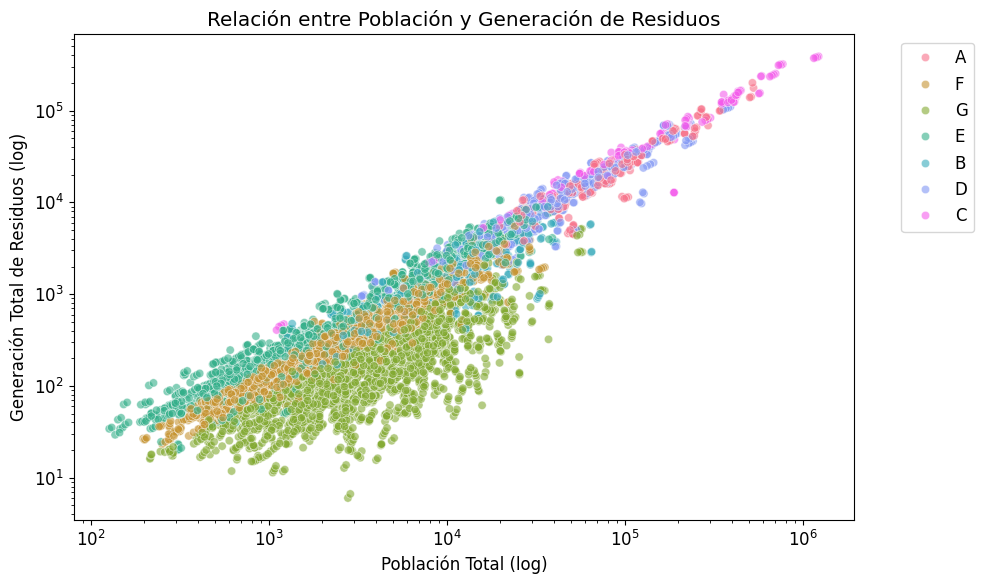

In [24]:

# VISUALIZACIONES PRELIMINARES

# Scatter plot: Población vs Generación de residuos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='POB_TOTAL_INEI', y='GENERACION_MUN_TANIO',
                hue='CLASIFICACION_MUNICIPAL_MEF', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Relación entre Población y Generación de Residuos')
plt.xlabel('Población Total (log)')
plt.ylabel('Generación Total de Residuos (log)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

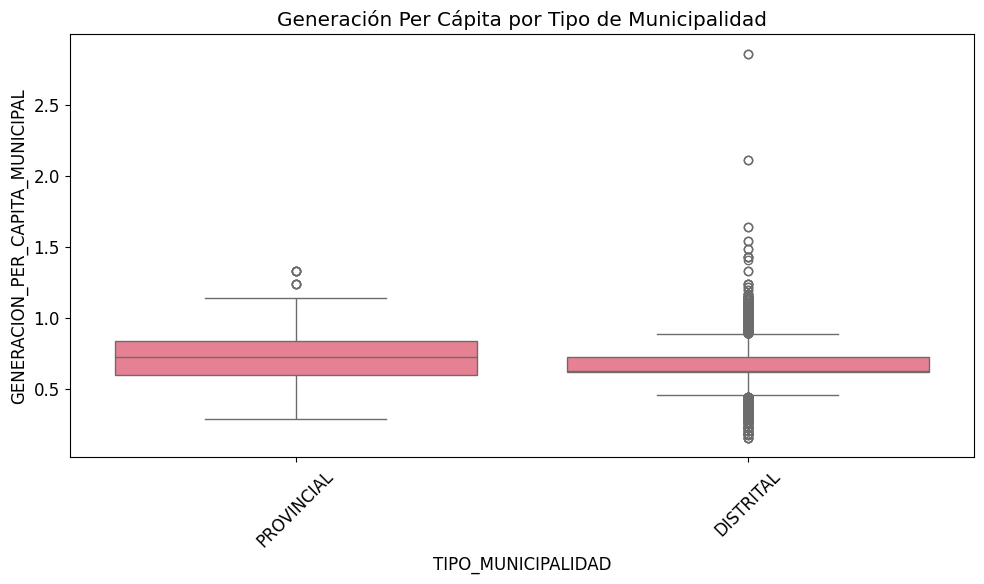

In [25]:
# Boxplot: Generación per cápita por tipo de municipalidad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TIPO_MUNICIPALIDAD', y='GENERACION_PER_CAPITA_MUNICIPAL')
plt.title('Generación Per Cápita por Tipo de Municipalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
print("\n" + "="*60)
print("RESUMEN PRE-CLUSTERING")
print("="*60)
print(f"Total de registros: {df.shape[0]}")
print(f"Variables numéricas para clustering: {numeric_vars}")
print(f"Variables categóricas codificadas: {[col for col in df_encoded.columns if col.startswith(('TIPO_', 'CLASIF_'))]}")
print(f"Datos escalados y listos para clustering: {df_scaled.shape}")


RESUMEN PRE-CLUSTERING
Total de registros: 7488
Variables numéricas para clustering: ['POB_TOTAL_INEI', 'POB_URBANA_INEI', 'POB_URBANA_INEI', 'GENERACION_MUN_TANIO', 'GENERACION_PER_CAPITA_MUNICIPAL']
Variables categóricas codificadas: ['TIPO_DISTRITAL', 'TIPO_PROVINCIAL', 'CLASIF_A', 'CLASIF_B', 'CLASIF_C', 'CLASIF_D', 'CLASIF_E', 'CLASIF_F', 'CLASIF_G']
Datos escalados y listos para clustering: (7488, 13)


In [27]:
#PRIMERO USAMOS METODOS PARA DETERMINAR EL NUMERO OPTIMO DE CLUSTERS
# Método del codo
inertias = []
silhouette_scores = []
k_range = range(2, 11)
print("\nCalculando métricas para diferentes valores de k...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)

    inertias.append(kmeans.inertia_)

    # Silhouette score (excepto para k=1)
    if k > 1:
        silhouette_avg = silhouette_score(df_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"K={k}: Inercia = {kmeans.inertia_:.2f}, Silhouette = {silhouette_avg:.3f}")
    else:
        silhouette_scores.append(np.nan)


Calculando métricas para diferentes valores de k...
K=2: Inercia = 22745.00, Silhouette = 0.854
K=3: Inercia = 17720.19, Silhouette = 0.447
K=4: Inercia = 14473.72, Silhouette = 0.389
K=5: Inercia = 12450.53, Silhouette = 0.333
K=6: Inercia = 10658.00, Silhouette = 0.347
K=7: Inercia = 9083.61, Silhouette = 0.447
K=8: Inercia = 7827.03, Silhouette = 0.484
K=9: Inercia = 6676.94, Silhouette = 0.529
K=10: Inercia = 5864.96, Silhouette = 0.541


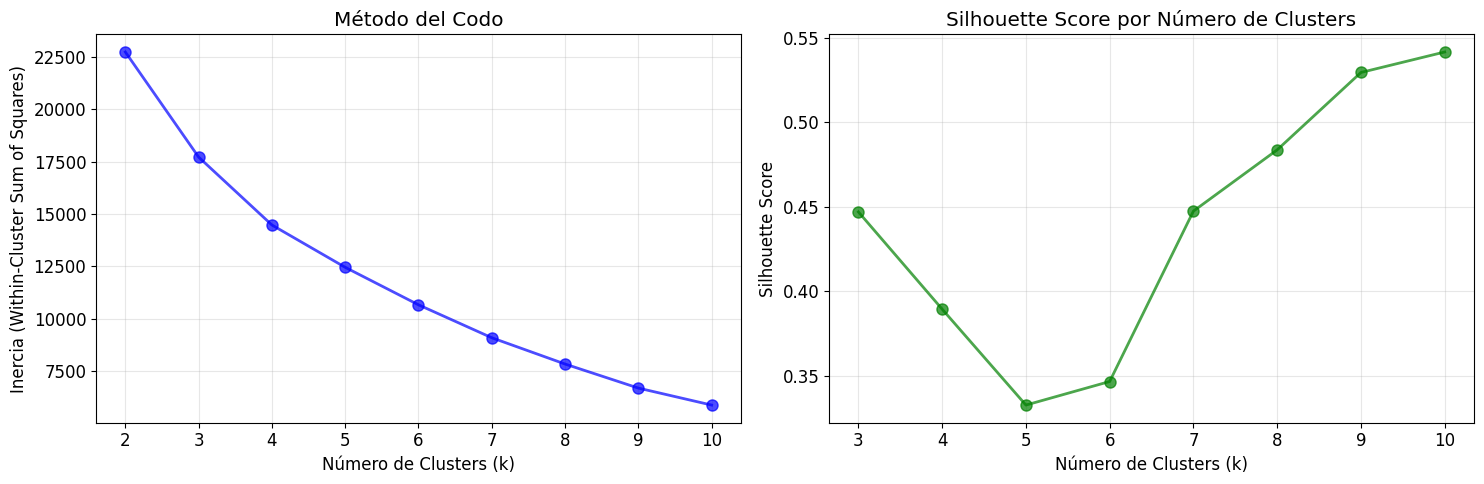

In [28]:
# Graficar método del codo y silhouette score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico del codo
ax1.plot(k_range, inertias, 'bo-', alpha=0.7, linewidth=2, markersize=8)
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia (Within-Cluster Sum of Squares)')
ax1.set_title('Método del Codo')
ax1.grid(True, alpha=0.3)
# Gráfico de silhouette score
ax2.plot(k_range[1:], silhouette_scores[1:], 'go-', alpha=0.7, linewidth=2, markersize=8)
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score por Número de Clusters')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [29]:
# 3. SELECCIÓN DEL K ÓPTIMO BASADO EN LAS MÉTRICAS

# Encontrar k óptimo (máximo silhouette score)
optimal_k_silhouette = k_range[np.argmax(silhouette_scores[1:]) + 1]
optimal_silhouette = max(silhouette_scores[1:])

print(f"\nK óptimo basado en Silhouette Score: {optimal_k_silhouette}")
print(f"Silhouette Score máximo: {optimal_silhouette:.3f}")

# También considerar el "codo" en la gráfica de inercia
# Calcular la segunda derivada para encontrar el punto de inflexión
inertia_diff = np.diff(inertias)
inertia_diff_ratio = np.diff(inertia_diff) / inertia_diff[:-1]
optimal_k_elbow = k_range[np.argmin(inertia_diff_ratio) + 2]

print(f"K sugerido por método del codo: {optimal_k_elbow}")

# Seleccionar k final (convenimos en usar k=4, del analisis de los coeficientes obtenidos en ambos metodos)
k_final = 4
print(f"K final seleccionado: {k_final}")


K óptimo basado en Silhouette Score: 10
Silhouette Score máximo: 0.541
K sugerido por método del codo: 5
K final seleccionado: 4


In [30]:
print(f"\nAplicando K-Means con k={k_final}...")

kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=20)
df_scaled['CLUSTER'] = kmeans_final.fit_predict(df_scaled)

# Añadir clusters al dataframe original para análisis
df['CLUSTER'] = df_scaled['CLUSTER']

print("K-Means completado exitosamente!")
print(f"Distribución de clusters:")
cluster_distribution = df['CLUSTER'].value_counts().sort_index()
print(cluster_distribution)


Aplicando K-Means con k=4...
K-Means completado exitosamente!
Distribución de clusters:
CLUSTER
0    5831
1      14
2     150
3    1493
Name: count, dtype: int64


In [31]:
# 5. ANÁLISIS DE LOS CLUSTERS - VARIABLES ORIGINALES


print("\n" + "="*60)
print("ANÁLISIS DETALLADO DE CLUSTERS")
print("="*60)

# Variables clave para el análisis
key_variables = [
    'POB_TOTAL_INEI', 'POB_URBANA_INEI',
    'GENERACION_MUN_TANIO', 'GENERACION_PER_CAPITA_MUNICIPAL'
]

# Análisis por cluster
cluster_analysis = df.groupby('CLUSTER').agg({
    'POB_TOTAL_INEI': ['count', 'mean', 'median', 'std'],
    'POB_URBANA_INEI': ['mean', 'median'],
    'GENERACION_MUN_TANIO': ['mean', 'median', 'sum'],
    'GENERACION_PER_CAPITA_MUNICIPAL': ['mean', 'median'],
    'TIPO_MUNICIPALIDAD': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'N/A',
    'CLASIFICACION_MUNICIPAL_MEF': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'N/A'
}).round(2)

# Renombrar columnas para mejor legibilidad
cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns.values]
print(cluster_analysis)



ANÁLISIS DETALLADO DE CLUSTERS
         POB_TOTAL_INEI_count  POB_TOTAL_INEI_mean  POB_TOTAL_INEI_median  \
CLUSTER                                                                     
0                        5831              5804.13                 2973.0   
1                          14            831604.36               736659.0   
2                         150            269628.83               228618.0   
3                        1493             29922.08                16355.0   

         POB_TOTAL_INEI_std  POB_URBANA_INEI_mean  POB_URBANA_INEI_median  \
CLUSTER                                                                     
0                   9515.83               2956.86                   941.0   
1                 241853.03             831604.36                736659.0   
2                 104769.41             266214.39                225214.5   
3                  33219.83              25695.13                 10704.0   

         GENERACION_MUN_TANIO_mean  GENERA

In [32]:
# 6.1 ¿Existen grupos con alta generación pero baja población?
print("\n1. ANÁLISIS: ALTA GENERACIÓN vs BAJA POBLACIÓN")

umbral_alta_generacion = df['GENERACION_MUN_TANIO'].quantile(0.60)  # antes 0.75
umbral_baja_poblacion = df['POB_TOTAL_INEI'].quantile(0.40)         # antes 0.25

alta_gen_baja_pob = df[
    (df['GENERACION_MUN_TANIO'] > umbral_alta_generacion) &
    (df['POB_TOTAL_INEI'] < umbral_baja_poblacion)
]

print(f"• Umbral alta generación: {umbral_alta_generacion:.0f} ton/año")
print(f"• Umbral baja población: {umbral_baja_poblacion:.0f} habitantes")
print(f"• Distritos con alta generación y baja población: {len(alta_gen_baja_pob)}")
print(f"• Clusters donde se encuentran: {sorted(alta_gen_baja_pob['CLUSTER'].unique())}")

# Análisis por cluster de esta condición
if len(alta_gen_baja_pob) > 0:
    cluster_analysis_condicion = alta_gen_baja_pob.groupby('CLUSTER').size()
    print(f"• Distribución por cluster:")
    for cluster, count in cluster_analysis_condicion.items():
        total_en_cluster = len(df[df['CLUSTER'] == cluster])
        porcentaje = (count / total_en_cluster) * 100
        print(f"  Cluster {cluster}: {count} distritos ({porcentaje:.1f}% del cluster))")



1. ANÁLISIS: ALTA GENERACIÓN vs BAJA POBLACIÓN
• Umbral alta generación: 464 ton/año
• Umbral baja población: 2735 habitantes
• Distritos con alta generación y baja población: 67
• Clusters donde se encuentran: [np.int32(0), np.int32(3)]
• Distribución por cluster:
  Cluster 0: 15 distritos (0.3% del cluster))
  Cluster 3: 52 distritos (3.5% del cluster))


In [33]:
# 6.2 ¿Cómo se relaciona el tipo de municipalidad con la generación de residuos?
print("\n2. ANÁLISIS: TIPO MUNICIPALIDAD vs GENERACIÓN RESIDUOS")

# Tabla cruzada entre cluster y tipo de municipalidad
cross_tab_tipo = pd.crosstab(df['CLUSTER'], df['TIPO_MUNICIPALIDAD'], normalize='index') * 100
print("Distribución de tipos de municipalidad por cluster (%):")
print(cross_tab_tipo.round(1))

# Tabla cruzada entre cluster y clasificación MEF
cross_tab_clasif = pd.crosstab(df['CLUSTER'], df['CLASIFICACION_MUNICIPAL_MEF'], normalize='index') * 100
print("\nDistribución de clasificación MEF por cluster (%):")
print(cross_tab_clasif.round(1))


2. ANÁLISIS: TIPO MUNICIPALIDAD vs GENERACIÓN RESIDUOS
Distribución de tipos de municipalidad por cluster (%):
TIPO_MUNICIPALIDAD  DISTRITAL  PROVINCIAL
CLUSTER                                  
0                        94.8         5.2
1                       100.0         0.0
2                        68.0        32.0
3                        71.1        28.9

Distribución de clasificación MEF por cluster (%):
CLASIFICACION_MUNICIPAL_MEF     A     B      C     D     E     F     G
CLUSTER                                                               
0                             0.5   4.8    0.2   2.8  19.7  32.1  40.0
1                             0.0   0.0  100.0   0.0   0.0   0.0   0.0
2                            32.0   0.0   42.7  25.3   0.0   0.0   0.0
3                            14.8  14.1    5.3  20.6  24.4  10.8  10.0


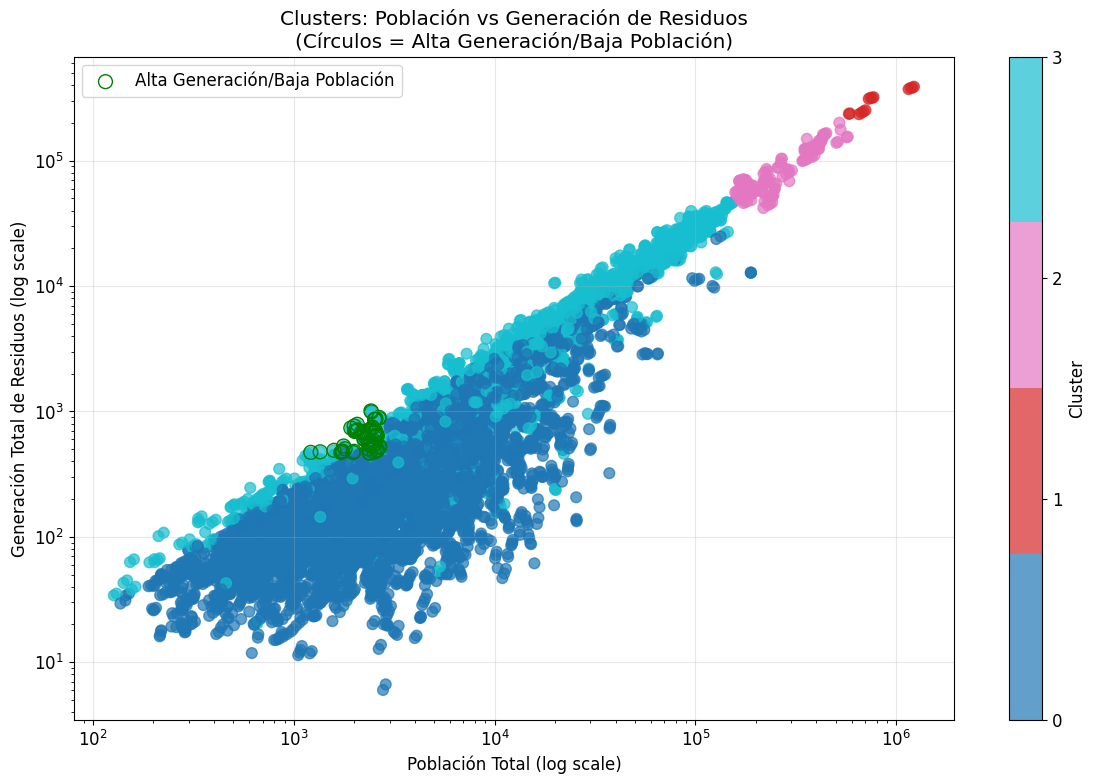

In [34]:
# 7. VISUALIZACIÓN DE RESULTADOS

# 7.1 Scatter plot: Población vs Generación (coloreado por cluster)
import matplotlib.cm as cm

# Número de clusters que realmente tenemos
n_clusters = df['CLUSTER'].nunique()

# Crear un mapa de colores con n_clusters
cmap = cm.get_cmap('tab10', n_clusters)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['POB_TOTAL_INEI'], df['GENERACION_MUN_TANIO'],
                     c=df['CLUSTER'], cmap=cmap, alpha=0.7, s=60)

# Ajustar la barra de colores con número correcto de ticks
cbar = plt.colorbar(scatter, ticks=range(n_clusters))
cbar.set_label('Cluster')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Población Total (log scale)')
plt.ylabel('Generación Total de Residuos (log scale)')
plt.title('Clusters: Población vs Generación de Residuos\n(Círculos = Alta Generación/Baja Población)')
plt.grid(True, alpha=0.3)

# Destacar distritos con alta generación/baja población
if len(alta_gen_baja_pob) > 0:
    plt.scatter(alta_gen_baja_pob['POB_TOTAL_INEI'],
                alta_gen_baja_pob['GENERACION_MUN_TANIO'],
                facecolors='none', edgecolors='green', s=100,
                label='Alta Generación/Baja Población')
    plt.legend()

plt.tight_layout()
plt.show()

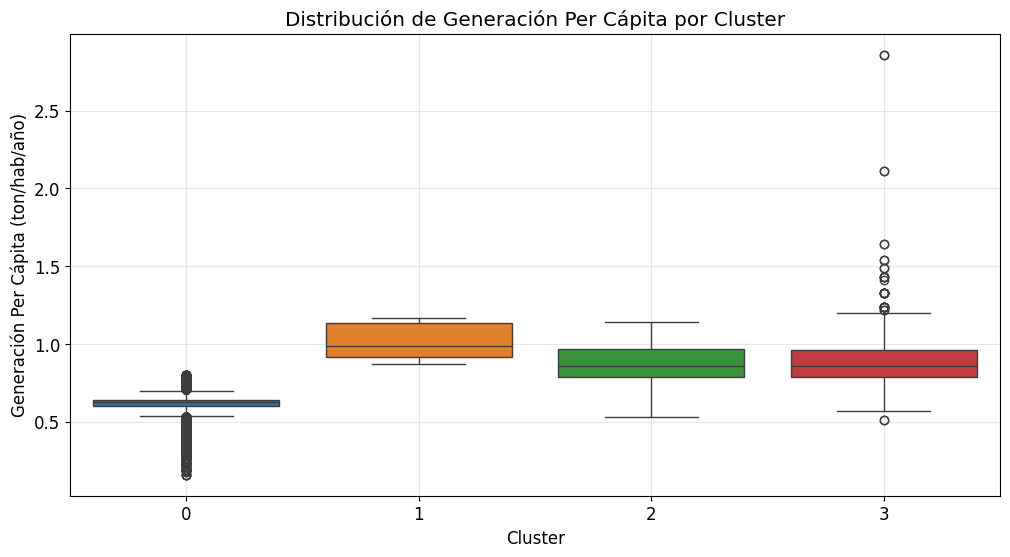

In [35]:
# 7.2 Boxplot: Generación per cápita por cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='CLUSTER', y='GENERACION_PER_CAPITA_MUNICIPAL', palette='tab10')
plt.title('Distribución de Generación Per Cápita por Cluster')
plt.ylabel('Generación Per Cápita (ton/hab/año)')
plt.xlabel('Cluster')
plt.grid(True, alpha=0.3)
plt.show()

In [36]:
 #8. PERFILADO DETALLADO DE CLUSTERS

print("\n" + "="*60)
print("PERFILES DE CLUSTERS - RESUMEN EJECUTIVO")
print("="*60)

for cluster_id in range(k_final):
    cluster_data = df[df['CLUSTER'] == cluster_id]

    print(f"\n CLUSTER {cluster_id} ({len(cluster_data)} distritos)")
    print("-" * 50)

    # Características demográficas
    print(f" CARACTERÍSTICAS DEMOGRÁFICAS:")
    print(f"   • Población promedio: {cluster_data['POB_TOTAL_INEI'].mean():.0f} hab")
    print(f"   • Población urbana promedio: {cluster_data['POB_URBANA_INEI'].mean():.0f} hab")
    print(f"   • Urbanización: {(cluster_data['POB_URBANA_INEI'].mean() / cluster_data['POB_TOTAL_INEI'].mean() * 100):.1f}%")

    # Características de residuos
    print(f"  GENERACIÓN DE RESIDUOS:")
    print(f"   • Generación total promedio: {cluster_data['GENERACION_MUN_TANIO'].mean():.0f} ton/año")
    print(f"   • Generación per cápita: {cluster_data['GENERACION_PER_CAPITA_MUNICIPAL'].mean():.2f} ton/hab/año")
    # Características institucionales
    tipo_comun = cluster_data['TIPO_MUNICIPALIDAD'].mode()[0]
    clasif_comun = cluster_data['CLASIFICACION_MUNICIPAL_MEF'].mode()[0]

    print(f"  CARACTERÍSTICAS INSTITUCIONALES:")
    print(f"   • Tipo municipalidad predominante: {tipo_comun}")
    print(f"   • Clasificación MEF predominante: {clasif_comun}")

    # Identificar si es cluster problemático (alta generación/baja población)
    problem_count = len(cluster_data[
        (cluster_data['GENERACION_MUN_TANIO'] > umbral_alta_generacion) &
        (cluster_data['POB_TOTAL_INEI'] < umbral_baja_poblacion)
    ])

    if problem_count > 0:
        print(f"  DISTRITOS PROBLEMÁTICOS: {problem_count} con alta generación/baja población")


PERFILES DE CLUSTERS - RESUMEN EJECUTIVO

 CLUSTER 0 (5831 distritos)
--------------------------------------------------
 CARACTERÍSTICAS DEMOGRÁFICAS:
   • Población promedio: 5804 hab
   • Población urbana promedio: 2957 hab
   • Urbanización: 50.9%
  GENERACIÓN DE RESIDUOS:
   • Generación total promedio: 613 ton/año
   • Generación per cápita: 0.61 ton/hab/año
  CARACTERÍSTICAS INSTITUCIONALES:
   • Tipo municipalidad predominante: DISTRITAL
   • Clasificación MEF predominante: G
  DISTRITOS PROBLEMÁTICOS: 15 con alta generación/baja población

 CLUSTER 1 (14 distritos)
--------------------------------------------------
 CARACTERÍSTICAS DEMOGRÁFICAS:
   • Población promedio: 831604 hab
   • Población urbana promedio: 831604 hab
   • Urbanización: 100.0%
  GENERACIÓN DE RESIDUOS:
   • Generación total promedio: 303202 ton/año
   • Generación per cápita: 1.02 ton/hab/año
  CARACTERÍSTICAS INSTITUCIONALES:
   • Tipo municipalidad predominante: DISTRITAL
   • Clasificación MEF predomi


Varianza explicada por componentes PCA:
PC1: 0.624 (62.4%)
PC2: 0.185 (18.5%)
Total: 0.809 (80.9%)


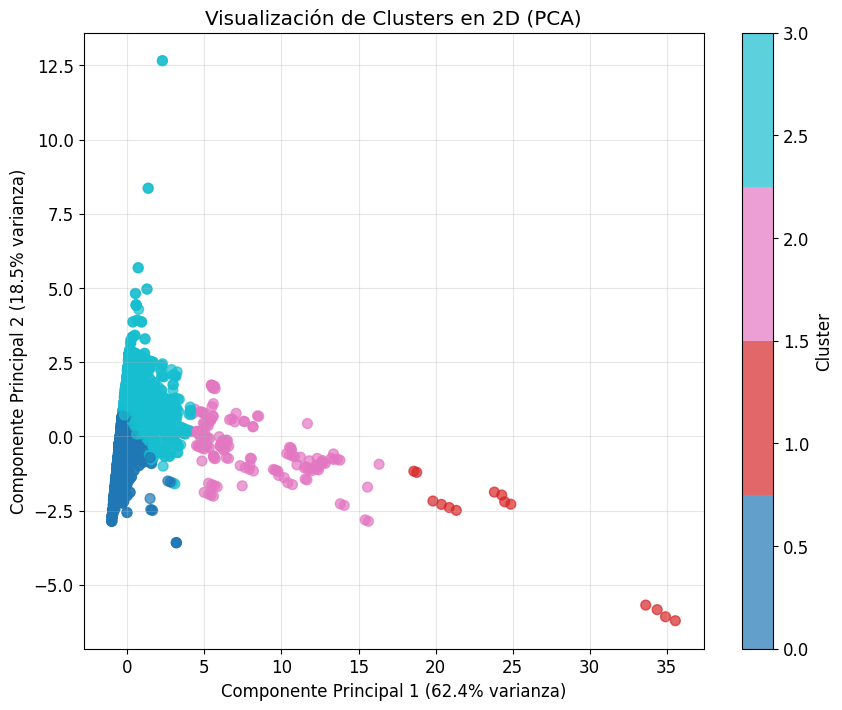

In [37]:
#9. ANÁLISIS DE COMPONENTES PRINCIPALES (OPCIONAL - PARA VISUALIZACIÓN)


from sklearn.decomposition import PCA

# Aplicar PCA para visualización 2D/3D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop('CLUSTER', axis=1))

# Crear dataframe para visualización PCA
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['CLUSTER'] = df_scaled['CLUSTER'].values

print(f"\nVarianza explicada por componentes PCA:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f} ({pca.explained_variance_ratio_[0]*100:.1f}%)")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f} ({pca.explained_variance_ratio_[1]*100:.1f}%)")
print(f"Total: {pca.explained_variance_ratio_.sum():.3f} ({pca.explained_variance_ratio_.sum()*100:.1f}%)")

# Visualización PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['CLUSTER'],
                     cmap=cmap, alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.title('Visualización de Clusters en 2D (PCA)')
plt.grid(True, alpha=0.3)
plt.show()